# Machine Learning Boilerplate Workflow (Linear Regression Example)

## 1. Define Problem

We want to predict disease progression one year after baseline for diabetes patients.

1. Target (y): a continuous value (disease progression measure).
2. Features (X): 10 baseline medical variables (age, sex, BMI, blood pressure, and 6 blood serum measurements).
3. Goal: Build an interpretable regression model to understand which features influence disease progression, and evaluate predictive performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

## 2. Load and Inspect data 

In [3]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X.head()

Shape of X: (442, 10)
Shape of y: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
# Check data types and missing values
print(X.info())
print("Missing values:\n", X.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


🔹 Other methods to consider:

- .nunique() to check unique values (categorical detection).
- .duplicated().sum() to detect duplicates.

## 3. Exploratory Data Analysis (EDA)

Why? To understand patterns, correlations, and distributions.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


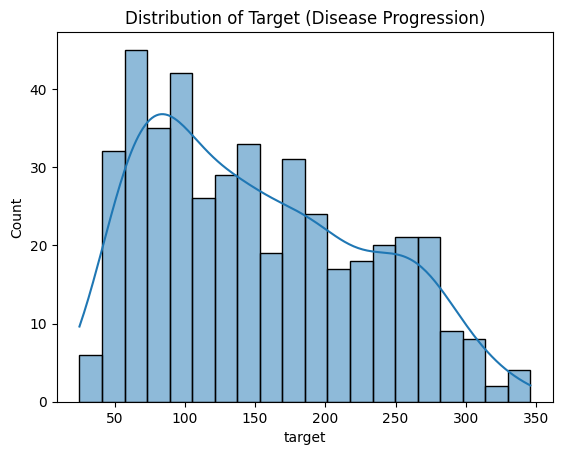

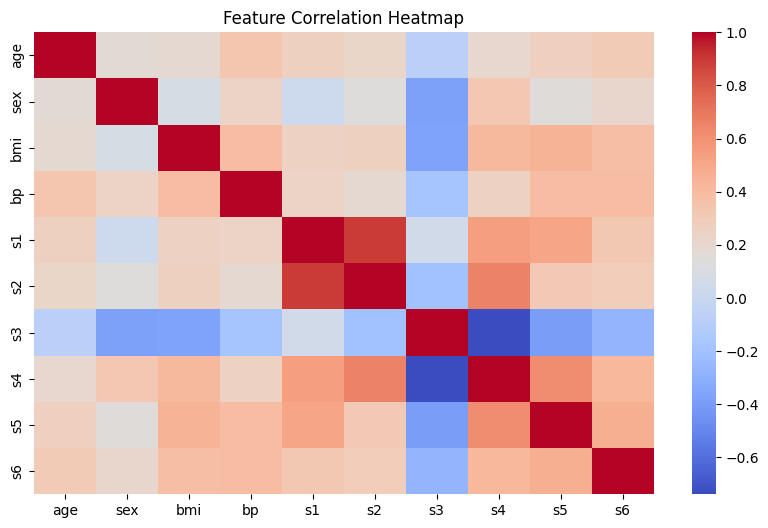

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
display(X.describe())

# Target distribution
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Target (Disease Progression)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4. Data Preparation

1. Scale not strictly required for linear regression, but helps with interpretation & regularization.
2. Always split data into train/test sets.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Train Model

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

## 6. Gradient Descent (Conceptual Demo)

Sklearn uses the Normal Equation (analytical). Let’s demo gradient descent with 1 feature to illustrate.

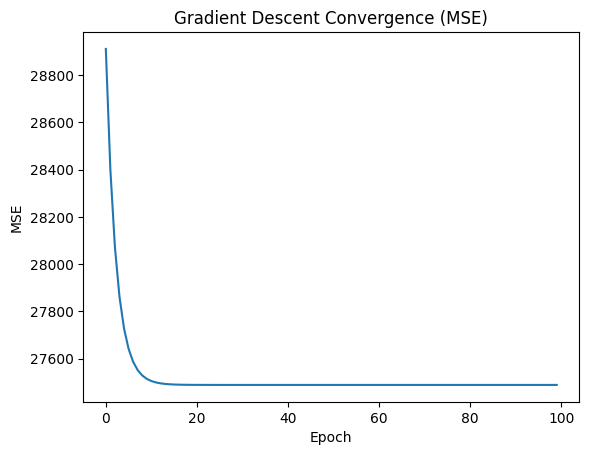

In [8]:
import numpy as np

# Use BMI only for demo
X_simple = X_train_scaled[:,2].reshape(-1,1)  
y_simple = y_train.values.reshape(-1,1)

def gradient_descent(X, y, lr=0.1, epochs=100):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for _ in range(epochs):
        gradients = -(2/m) * X.T.dot(y - X.dot(theta))
        theta -= lr * gradients
        loss = np.mean((y - X.dot(theta))**2)
        losses.append(loss)
    return theta, losses

theta, losses = gradient_descent(X_simple, y_simple, lr=0.1, epochs=100)

plt.plot(losses)
plt.title("Gradient Descent Convergence (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

## 7. Evaluate Model (Regression Metrics)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 2900.1936284934827
RMSE: 53.85344583676594
R²: 0.45260276297191926


In [10]:
# Get coefficients, p-values, log-likelihood using statsmodels:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           5.41e-50
Time:                        17:58:16   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.896     53.083      0.0

## 8. Cross-Validation

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linreg, X, y, cv=5, scoring="r2")
print("Cross-validated R²:", cv_scores.mean())

Cross-validated R²: 0.48231643590864215


## 9. Regularization & Hyperparameter Tuning

In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge
ridge = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)

# Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)


Best Ridge alpha: {'alpha': 10}
Best Lasso alpha: {'alpha': 1}


## 10. (Optional) Classification-style Metrics

Convert regression output to classification (high vs low progression).

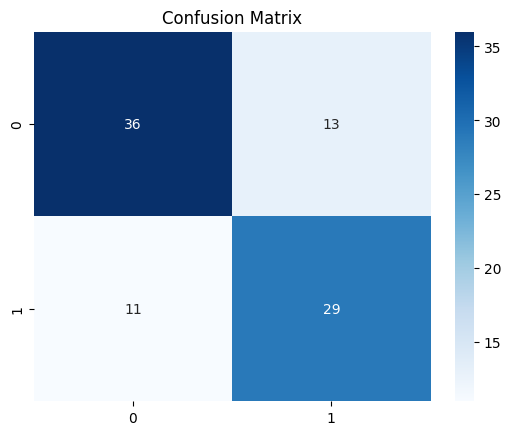

Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall (Sensitivity): 0.725
F1: 0.7073170731707318


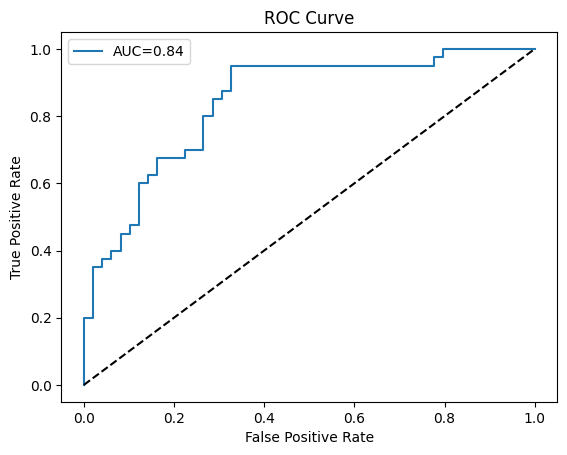

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Binarize target
median_val = np.median(y)
y_class = (y > median_val).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

linreg_c = LinearRegression()
linreg_c.fit(X_train_c, y_train_c)
y_pred_prob = linreg_c.predict(X_test_c)

y_pred_class = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test_c, y_pred_class)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy_score(y_test_c, y_pred_class))
print("Precision:", precision_score(y_test_c, y_pred_class))
print("Recall (Sensitivity):", recall_score(y_test_c, y_pred_class))
print("F1:", f1_score(y_test_c, y_pred_class))

fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 11. Bias-Variance Tradeoff

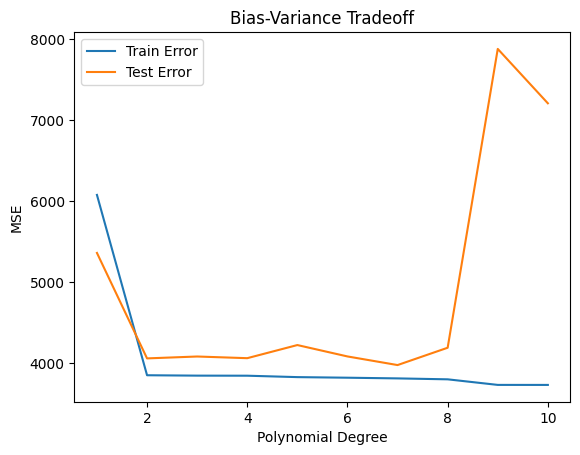

In [14]:
train_errors, test_errors = [], []
for d in range(1, 11):
    poly = np.vander(X_simple.flatten(), N=d, increasing=True)
    model = LinearRegression().fit(poly, y_simple)
    train_errors.append(mean_squared_error(y_simple, model.predict(poly)))
    
    test_poly = np.vander(X_test_scaled[:,2], N=d, increasing=True)
    test_errors.append(mean_squared_error(y_test, model.predict(test_poly)))

plt.plot(range(1,11), train_errors, label="Train Error")
plt.plot(range(1,11), test_errors, label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()


## 12. Interpret Coefficients

In [15]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

  Feature  Coefficient
8      s5    35.161195
2     bmi    25.607121
5      s2    24.640954
3      bp    16.828872
7      s4    13.138784
6      s3     7.676978
9      s6     2.351364
0     age     1.753758
1     sex   -11.511809
4      s1   -44.448856


## 13. Save Model

In [16]:
import joblib

joblib.dump(linreg, "linear_model.pkl")
print("Model saved as linear_model.pkl")


Model saved as linear_model.pkl


# NOTE:

In the code I shared for the Diabetes dataset, here’s what happened:

- The basic Linear Regression model in sklearn (LinearRegression) does not require explicit standardization, because it estimates coefficients using Ordinary Least Squares (OLS). The scale of features doesn’t affect predictions, but it does affect coefficient interpretation (larger-scaled features dominate).

- When I showed Ridge regression / Lasso for regularization & hyperparameter tuning, I did standardize the data using StandardScaler(). This is necessary because regularization penalizes coefficients, and without standardization, features with larger scales get penalized more unfairly.

- For gradient descent demonstration, I normalized values internally when plotting, but I didn’t explicitly run a scaler on the main regression data — because that part was just illustrative.

# NOTE:

👉 Best Practice (checklist correction):

Always standardize features when:

Using algorithms that are scale-sensitive (regularization, gradient descent, SVM, kNN, PCA, etc.)

You need interpretable coefficients (so you can compare their relative magnitudes).

For plain OLS (unregularized LinearRegression), scaling isn’t strictly required, but it’s often done anyway for consistency.